In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.available
plt.style.use('seaborn-white')

# Principle
We order the bit strings by the value of their integer representations.
Then we compute the distance matrix between these strings for different kinds of distances.
Visualizing these matrices let us see the repetitive patterns in these distances, which are quite pretty in my opinion.


In [3]:
# Length of bit strings to generate
d = 9
n=2**d
print(n)
# Plot the grid of the first n integers
x = np.arange(n)
X,Y = np.meshgrid(x,x)

512


# Hamming's distance
We define the hamming distance with bitwise operations.

In [4]:
a = 205
b = 131
print(bin(a))
print(bin(b))
print(bin(a^b))

0b11001101
0b10000011
0b1001110


In [5]:
help('^') # this is xor.

Operator precedence
*******************

The following table summarizes the operator precedence in Python, from
lowest precedence (least binding) to highest precedence (most
binding).  Operators in the same box have the same precedence.  Unless
the syntax is explicitly given, operators are binary.  Operators in
the same box group left to right (except for exponentiation, which
groups from right to left).

Note that comparisons, membership tests, and identity tests, all have
the same precedence and have a left-to-right chaining feature as
described in the Comparisons section.

+-------------------------------------------------+---------------------------------------+
| Operator                                        | Description                           |
+=================================================+=======================================+
| "lambda"                                        | Lambda expression                     |
+------------------------------------------------

In [6]:
# it works for arrays too
a = np.array([2,8])
b = np.array([3,7])
print(a^b)

[ 1 15]


In [7]:
# hamming's weight : count the number of ones
#some constants
m1  = 0x5555555555555555; #binary: 0101...
m2  = 0x3333333333333333; #binary: 00110011..
m4  = 0x0f0f0f0f0f0f0f0f; #binary:  4 zeros,  4 ones ...
m8  = 0x00ff00ff00ff00ff; #binary:  8 zeros,  8 ones ...
m16 = 0x0000ffff0000ffff; #binary: 16 zeros, 16 ones ...
m32 = 0x00000000ffffffff; #binary: 32 zeros, 32 ones

def popcount64(x):
    x = (x & m1 ) + ((x >>  1) & m1 ); #put count of each  2 bits into those  2 bits 
    x = (x & m2 ) + ((x >>  2) & m2 ); #put count of each  4 bits into those  4 bits 
    x = (x & m4 ) + ((x >>  4) & m4 ); #put count of each  8 bits into those  8 bits 
    x = (x & m8 ) + ((x >>  8) & m8 ); #put count of each 16 bits into those 16 bits 
    x = (x & m16) + ((x >> 16) & m16); #put count of each 32 bits into those 32 bits 
    x = (x & m32) + ((x >> 32) & m32); #put count of each 64 bits into those 64 bits 
    return x

In [8]:
def hamming(x,y):
    """Return the hamming distance between the binary representation of x and y."""
    return popcount64(x^y)

In [9]:
#sanity check
hamming(a,b)

array([1, 4])

In [10]:
array_hamming  = hamming(X,Y)

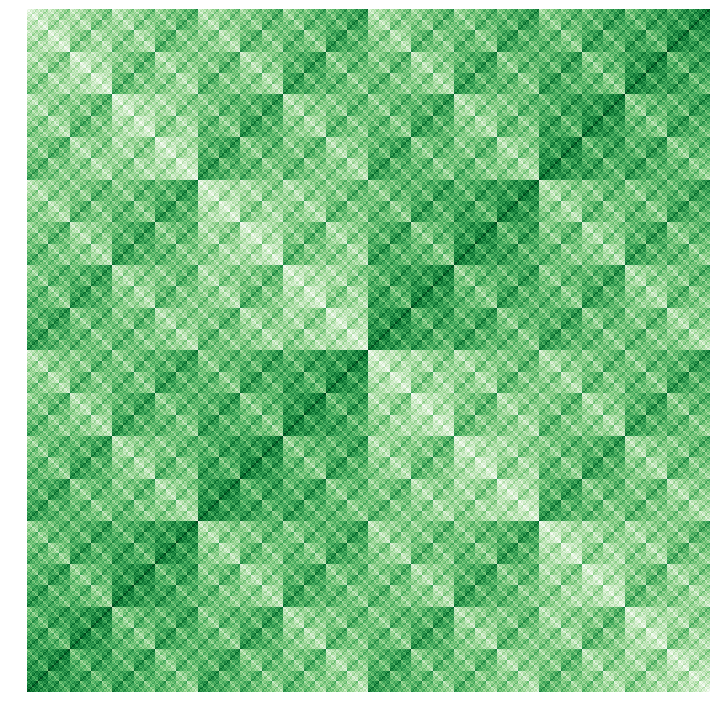

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(array_hamming ,interpolation='nearest',cmap='Greens')
plt.axis('off')
plt.tight_layout()
plt.savefig("images/hamming.png")
plt.savefig("images/hamming.pdf")

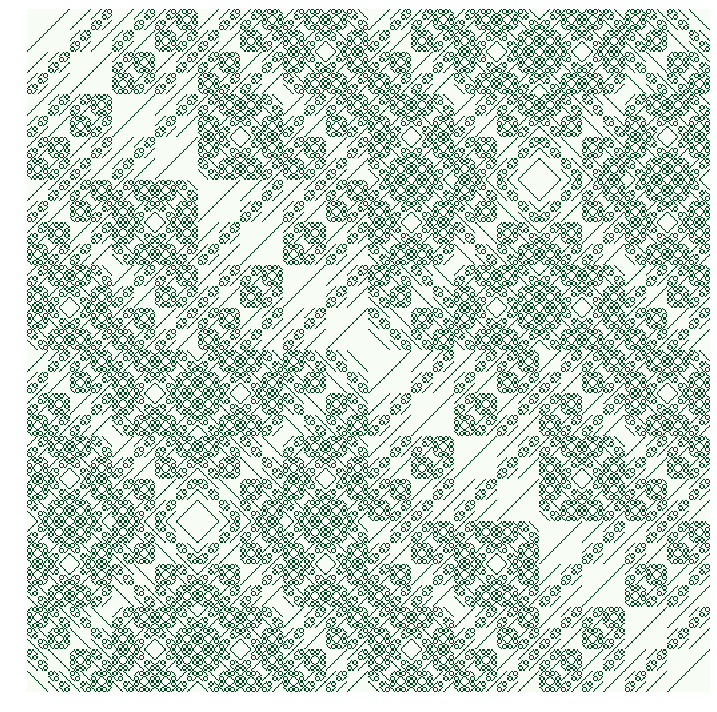

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(array_hamming ==5,interpolation='nearest',cmap='Greens')
plt.tight_layout()
plt.axis('off')
plt.savefig('images/hamming_level5.pdf')

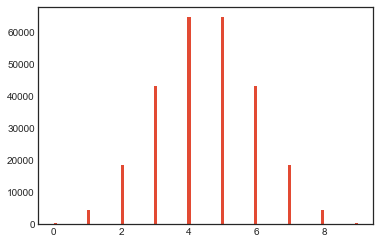

In [88]:
plt.hist(array_hamming.ravel(),100)
pass

# Hamming's weight
We define this pseudo-distance as the difference between the number of 'on' bits of both strings.

In [71]:
def hamweight(a,b):
    return np.absolute(popcount64(a)-popcount64(b))

In [89]:
array_weightdiff= hamweight(X,Y)

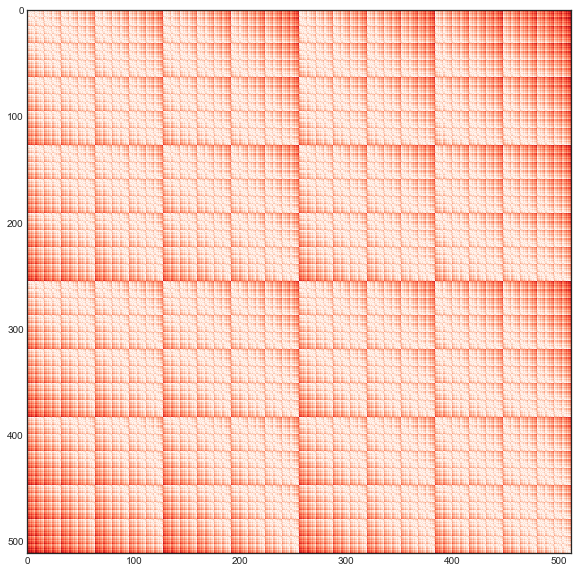

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(array_weightdiff,cmap='Reds',interpolation='nearest')

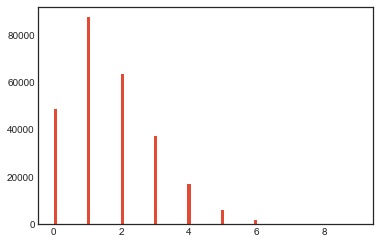

In [75]:
plt.hist(array_weightdiff.flatten(),100)
pass

# Set distances
We can also see each bit string of length $d$ as defining a subset of $\{1,\dots, d\}$. Let the bit string $x$ represent set $S$. If $x_i=1$, then $i\in S$. We study the following metrics:
* The Jaccard distance is a distance between sets. It's defined as $1$ minus the intersection over union.
* size of intersection
* size of union
* relative size of the overlap
They all give rise to triangular patterns ressembling closely to the 
[Sierpinski triangle](https://www.wikiwand.com/en/Sierpinski_triangle).

In [16]:
def jaccard(a,b):
    return 1-popcount64(a&b)/np.maximum(1,popcount64(a|b))

In [17]:
jaccard(6,7)

0.33333333333333337

In [18]:
array_jaccard= jaccard(X,Y)

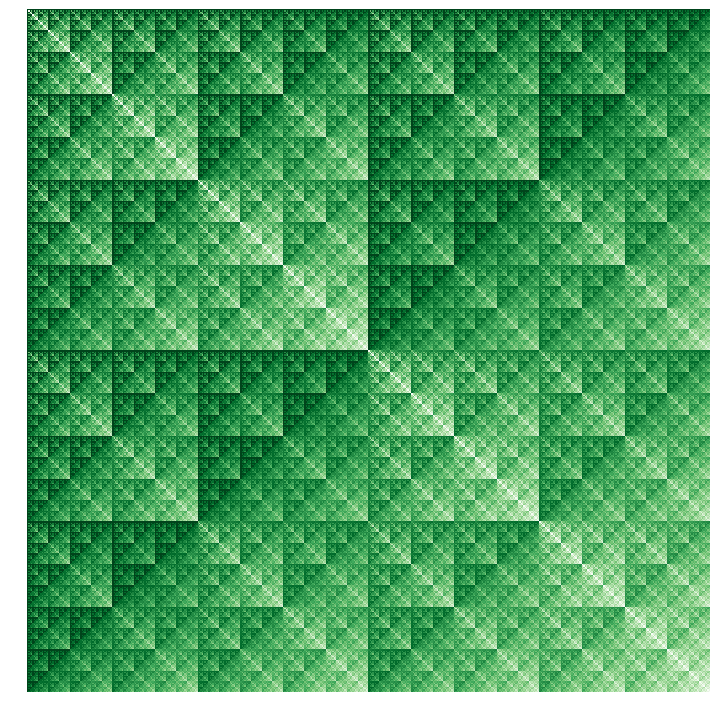

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(array_jaccard,cmap='Greens',interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.savefig("images/jaccard.png")
plt.savefig("images/jaccard.pdf")

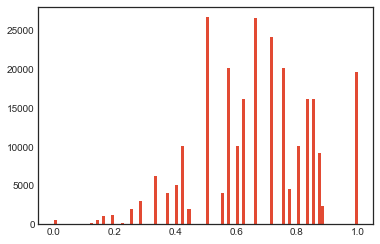

In [107]:
plt.hist(array_jaccard.flatten(),100)
pass

In [96]:
def intersectioncount(a,b):
    return popcount64(a&b)

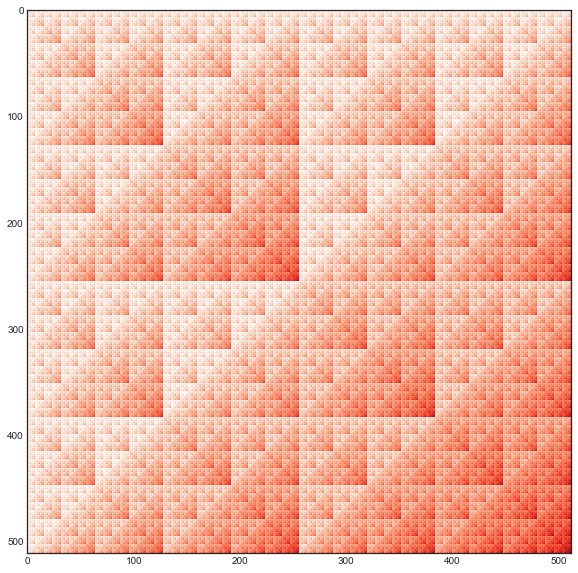

In [97]:
interdist = intersectioncount(X,Y)
plt.figure(figsize=(10,10))
plt.imshow(interdist,cmap='Reds',interpolation='nearest')

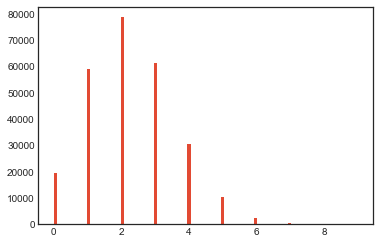

In [98]:
plt.hist(interdist.flatten(),100)
pass

In [99]:
def unioncount(a,b):
    return popcount64(a|b)

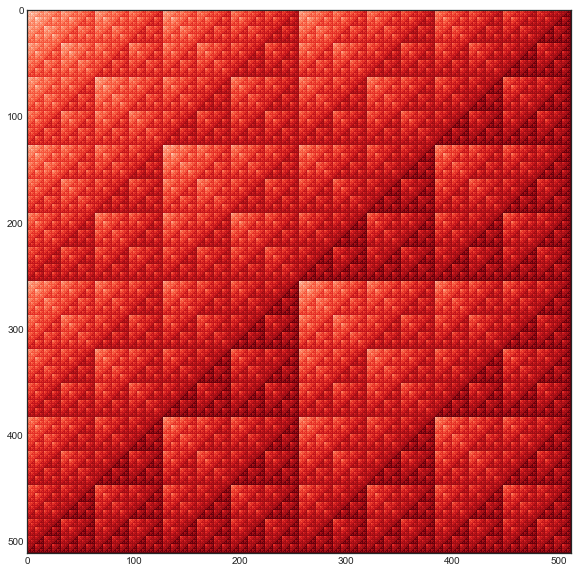

In [100]:
uniondist = unioncount(X,Y)
plt.figure(figsize=(10,10))
plt.imshow(uniondist,cmap='Reds',interpolation='nearest')

In [44]:
def overlap(a,b):
    return 1- popcount64(a&b)/np.maximum(1,np.minimum(popcount64(a),popcount64(b)))

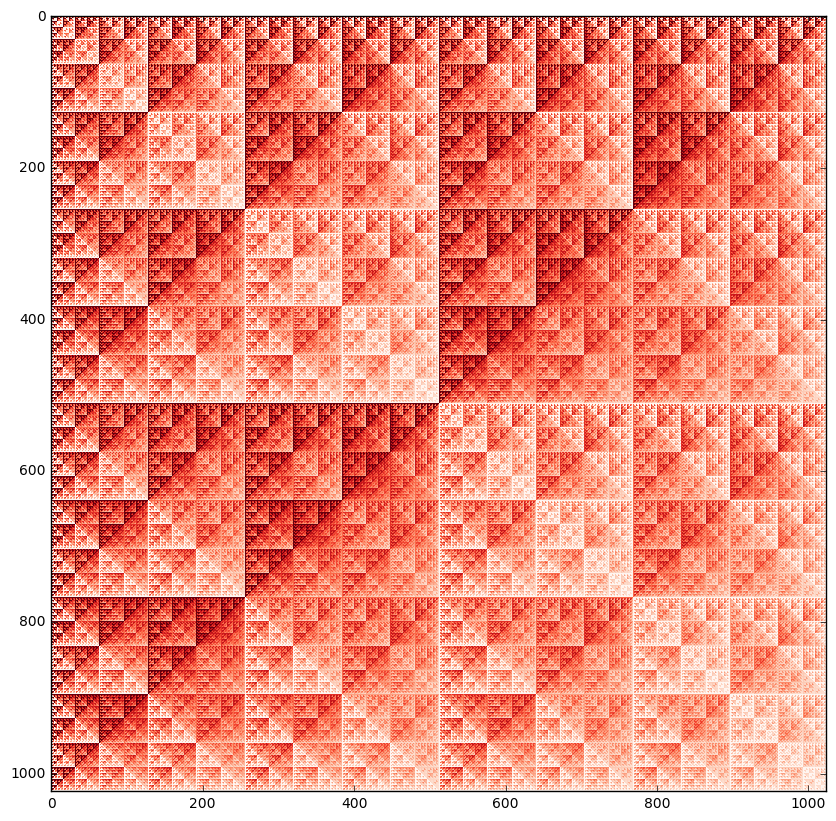

In [45]:
ovdist = overlap(X,Y)
plt.figure(figsize=(10,10))
plt.imshow(ovdist,cmap='Reds',interpolation='nearest')

# Cosine distance
This is the angle between two bistrings seen as vectors. 
Its pattern looks a lot like the set distances.

In [101]:
def cosine(a,b):
    return np.arccos(popcount64(a&b)/np.maximum(1,np.sqrt(popcount64(a)*popcount64(b))))

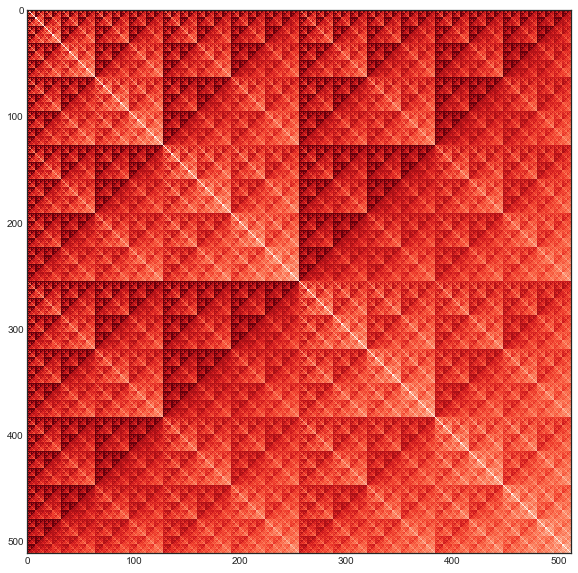

In [102]:
cosdist = cosine(X,Y)
plt.figure(figsize=(10,10))
plt.imshow(cosdist,cmap='Reds',interpolation='nearest')

# Levenshtein
Finally we tackle the Levenshtein distance, also called edition distance. This is one of the most natural distance between strings but there is no implementation in standard python, so we give one here. The patterns emerging from this distance are very interesting.

In [108]:
def levenshtein(r,s):
    """r and s two strings"""
    #k = 1 # affine gap penalty k+g*length # not yet
    gap = 1 # gap cost
    rep = 1 # replacement cost
    transp = 1 # transposition cost
    m = len(r)
    n = len(s)
    score = np.zeros([m+1,n+1])
    for i in range(1,m+1):
        score[i,0] = gap*i
    for j in range(1,n+1):
        score[0,j] = gap*j
    
    for i in range(1,m+1):
            for j in range(1,n+1):
                score[i,j] = min(score[i-1,j]+gap,min(score[i,j-1]+gap,score[i-1,j-1]+rep*(r[i-1]!=s[j-1])))
                # add the transposition
                if i>=2 and j>=2 and r[i-1]==s[j-2] and r[i-2]==s[j-1]:
                    score[i,j] = min(score[i,j],score[i-2,j-2]+transp)
    return score[m,n]
    

In [21]:
def binarylevenshtein(r,s):
    """r and s anything that receives bin"""
    # score constants
    #k = 1 # affine gap penalty k+g*length # not yet
    gap = 1 # gap cost
    rep = 1 # replacement cost
    transp = 2 # transposition cost
    
    # too slow
    m = 0
    rbis = r
    while rbis!=0:
        rbis= rbis>>1
        m+=1
    
    n = 0
    sbis = s
    while sbis!=0:
        sbis = sbis>>1
        n+=1
    
    #initialize the score array
    score = np.zeros([m+1,n+1])
    for i in range(1,m+1):
        score[i,0] = gap*i
    for j in range(1,n+1):
        score[0,j] = gap*j
        
    for i in range(1,m+1):
            for j in range(1,n+1):
                # (r>>i^s>>j)%2 = r[i-1]!=s[j-1]
                score[i,j] = min([score[i-1,j]+gap, # insert r[i-1]
                                  score[i,j-1]+gap, # insert s[j-1]
                                  score[i-1,j-1]+rep*(((r>>i-1)^(s>>j-1))%2)]) # match r[i-1] and s[j-1]
                # add the transposition
                if i>=2 and j>=2 and not ((r>>i-2^s>>j-1))%2 and not (r>>i-1^s>>j-2)%2:
                    score[i,j] = min(score[i,j],score[i-2,j-2]+transp)
    return score[m,n]
    

In [22]:
print(levenshtein("babar","babra"))
#print(lev.eval("babar","huang"))
print(binarylevenshtein(57,62))

NameError: name 'levenshtein' is not defined

In [23]:
levdist = np.empty([n,n])
for i in range(n):
    for j in range(i+1):
        levdist[i,j]= binarylevenshtein(i,j)#levenshtein(bin(i),bin(j))
        levdist[j,i]=levdist[i,j]

In [24]:
array_edit = levdist

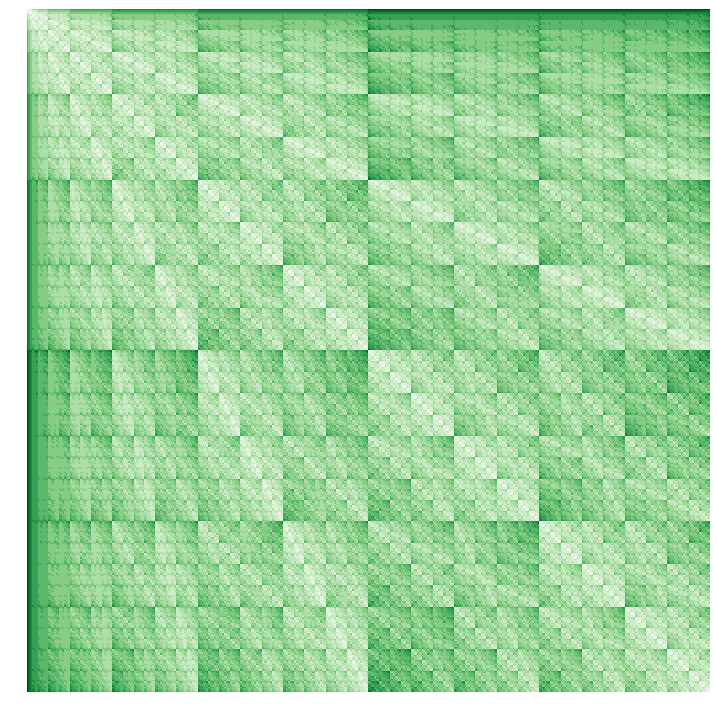

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(levdist,cmap='Greens',interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.savefig("images/levdist.png")
plt.savefig("images/levdist.pdf")

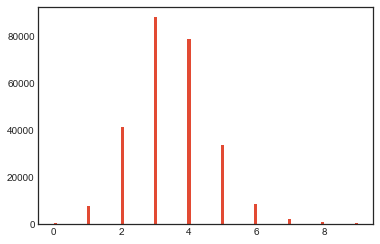

In [115]:
plt.hist(levdist.flatten(),100)
pass

In [116]:
%timeit(bin(np.random.randint(4096,8192)))
%timeit(levenshtein(bin(1800),bin(2756)))
%timeit(binarylevenshtein(1800,2756))

1.95 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
472 µs ± 7.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
366 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# $q$-gram distance
Now we represent each bit string by the count of $q$-grams it contains for various values of $q$: 1, 2, 3, ...

In [117]:
def qgram_int(a,q):
    """Return the qgram vector of a bit string represented
    by the integer a. q-grams are sorted in the lexicographical
    order of binary vectors.
    """
    aqgram = np.zeros(2**q)
    mask = 2**q-1
    w = a
    while w!=0 :
        aqgram[w&mask] +=1
        w = w>>1
    return aqgram

def qgram_array(a,q): 
    """Return the qgrams 2D array of a 1D array of integers a.
    q grams are sorted in the lexicographical order of binary vectors.
    """
    aqgram = np.zeros([*a.shape,2**q])
    mask = 2**q-1
    w = a
    while (w!=0).any():
        # not exactly the same distance because will add 0 in front of the lower numbers
        aqgram[np.arange(w.shape[0]),w&mask] +=1
        w = w>>1
    return aqgram
        
def qgram_distance(a,b,q,isarray=False):
    if not isarray:
        aqgram = qgram_int(a,q)
        bqgram = qgram_int(b,q)
    else:
        aqgram = qgram_array(a,q)
        bqgram = qgram_array(b,q)
    return np.sum(np.absolute(aqgram-bqgram),axis=-1)

In [118]:
print(qgram_array(np.array([65,71]),3))
print(qgram_int(65,3))
print(qgram_int(71,3))

[[3. 2. 1. 0. 1. 0. 0. 0.]
 [1. 2. 1. 1. 1. 0. 0. 1.]]
[3. 2. 1. 0. 1. 0. 0. 0.]
[1. 2. 1. 1. 1. 0. 0. 1.]


In [119]:
arr = np.arange(12).reshape((3,4))
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [120]:
arr[[0,2],[2,3]]

array([ 2, 11])

In [121]:
x = np.arange(n)
xgram = []
qdist = []
for q in range(1,11):
    xgram.append(qgram_array(x,q))
    qdist.append(np.sqrt(np.sum(np.absolute(xgram[-1][np.newaxis,:,:] - xgram[-1][:,np.newaxis,:])**2,axis=-1)))

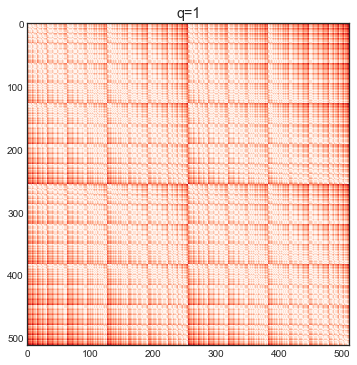

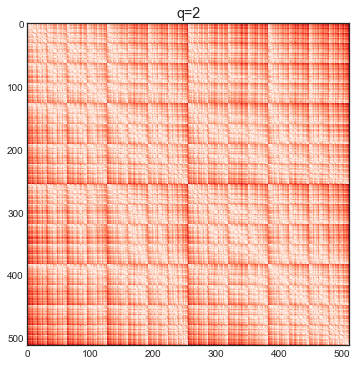

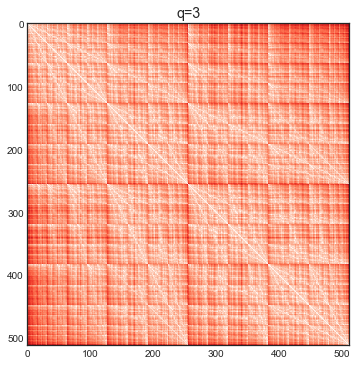

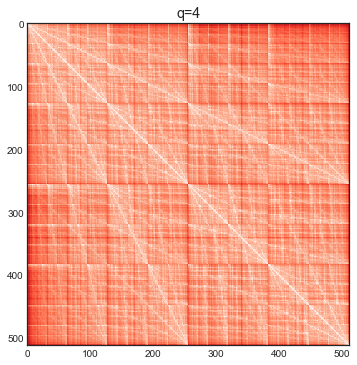

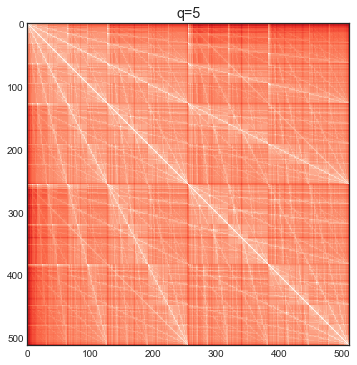

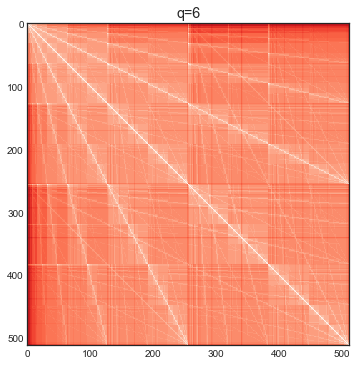

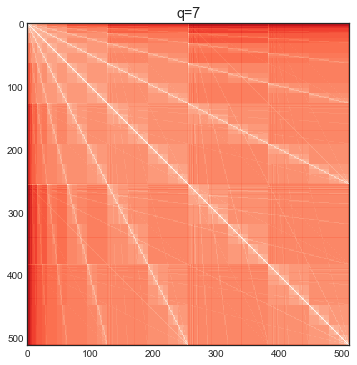

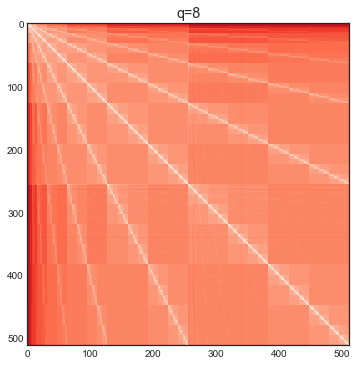

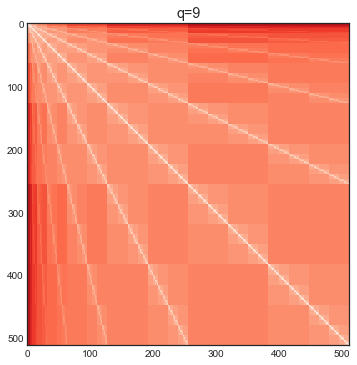

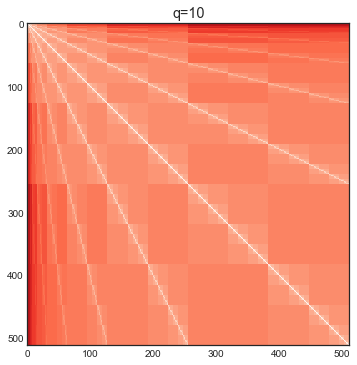

In [125]:
for q in range(1,11):
    plt.figure(figsize=(5,5))
    plt.imshow(qdist[q-1],cmap='Reds',interpolation='nearest')
    plt.tight_layout()
    plt.title('q={}'.format(q))
    #plt.savefig('images/l2_'+str(q)+'_gram.pdf')

Note how this distance almost interpolates between the raw population count ($q=1$) and the edition distance ($q=3,4$) before becoming too rough for the string length we consider.

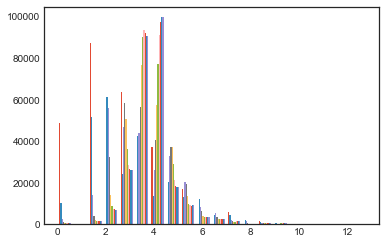

In [124]:
plt.hist([d.flatten() for d in qdist],20)
pass

# Wasserstein
The wasserstein distance is a distance between distributions.
Recall that we can see each bit string as a set, which can itself be seen as a collection of Diracs spread on the real line. We normalize these collection of diracs by the number of bits turned on so that they sum to 1. This is the definition we use to compute the 1D Wasserstein distance.

In [26]:
def wasserstein(a,b):
    # number of bits turned on.
    norma = np.maximum(1,popcount64(a))
    normb = np.maximum(1,popcount64(b))
    scorea = np.zeros_like(a,dtype=np.float64)
    scoreb = np.zeros_like(b,dtype=np.float64)
    distance = np.zeros([len(a),len(b)])
    while (a!=0).any() or (b!=0).any():
        # add the mass on the last bit of both chains
        scorea += (a%2)/norma
        scoreb += (b%2)/normb
        # shift the chains
        a = a>>1
        b = b>>1
        # move the earth
        distance += np.absolute(scorea[:,np.newaxis] - scoreb)
    return distance


In [27]:
wassdist = wasserstein(x,x)

In [28]:
array_wasserstein = wassdist

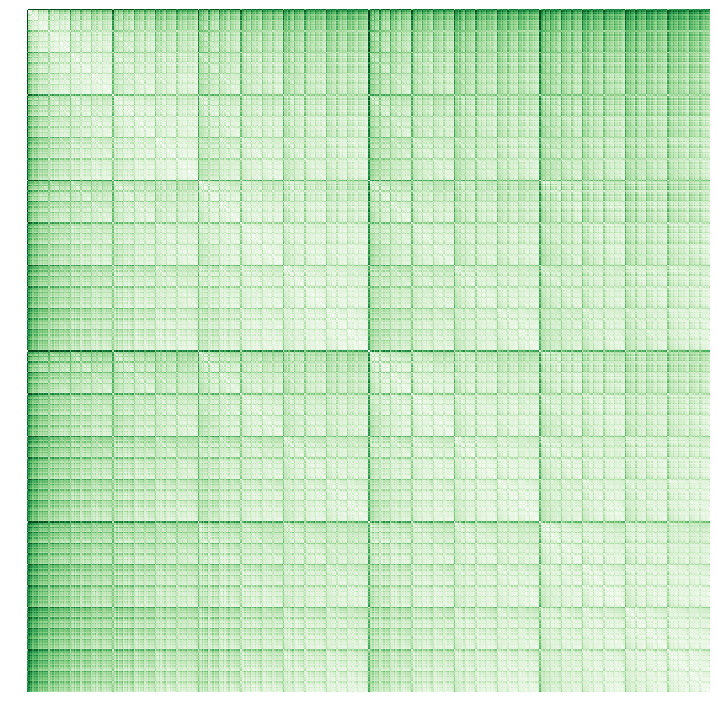

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(wassdist,cmap='Greens',interpolation='nearest',vmin=0,vmax=6)
plt.axis('off')
plt.tight_layout()
plt.savefig("images/wasserstein.png")
plt.savefig('images/wasserstein.pdf')

Again, this distance looks a lot like the difference between number of on-bits, eg the difference in population count.

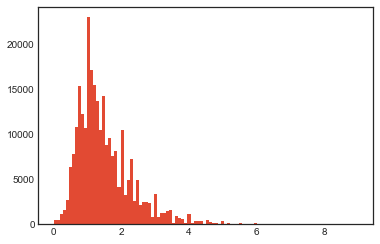

In [132]:
plt.hist(wassdist.flatten(),bins=100)
pass

# Rank of each distance
Most distances studied above can be used to evaluate our performance on a prediction task in supervised machine learning. According to [a recent paper](http://papers.nips.cc/paper/6634-on-structured-prediction-theory-with-calibrated-convex-surrogate-losses), the rank of the distance matrices we studied is a good proxy for the difficulty to optimize a loss.

We compute these ranks, as well as the spectrum of these matrix. We reach the contradictory conclusion that although the edition distance is upper-bounded by the Hamming distance, it is almost full rank while hamming is low rank. Simply looking at the distance matrix rank may be too simple. 

In [137]:
def rank(array):
    return np.linalg.matrix_rank(array, tol=1)

In [138]:
print("Rank of each loss for n={}".format(n))
print("Hamming: ", rank(array_hamming.astype(int)))
print("Jaccard: ", rank(array_jaccard))
print("Number of weights: ", rank(array_weightdiff.astype(int)))
print("Edition distance: ",rank(array_edit))
print("Wasserstein 1: ",rank(array_wasserstein))
print("qgram: ", [(i+1,rank(qg)) for i, qg in enumerate(qdist)])

Rank of each loss for n=512
Hamming:  10
Jaccard:  46
Number of weights:  10
Edition distance:  391
Wasserstein 1:  49
qgram:  [(1, 10), (2, 42), (3, 140), (4, 248), (5, 314), (6, 369), (7, 387), (8, 376), (9, 376), (10, 376)]


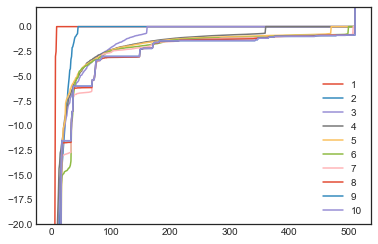

In [139]:
for i, qg in enumerate(qdist):
    plt.plot(np.linalg.eigvalsh(qg), label=i+1) 
    plt.ylim(-20,2)
plt.legend()

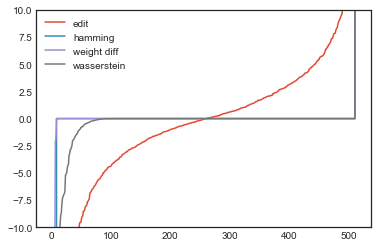

In [140]:
plt.plot(np.linalg.eigvalsh(array_edit), label='edit')
plt.plot(np.linalg.eigvalsh(array_hamming), label='hamming')
plt.plot(np.linalg.eigvalsh(array_weightdiff), label='weight diff')
plt.plot(np.linalg.eigvalsh(array_wasserstein), label='wasserstein')
plt.ylim(-10,10)
plt.legend()

In [141]:
def is_symmetric(array):
    return np.sum((array - array.transpose())**2) ==0

In [142]:
is_symmetric(array_edit)

True